In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
from math import pi

In [16]:
song = 'SpotifyAudioFeaturesApril2019.csv'
song1 = 'SpotifyAudioFeaturesNov2018.csv'

In [25]:
df2 = pd.read_csv(song)
df1 = pd.read_csv(song1)

In [26]:
print(df2.shape)
df.head()

(130663, 17)


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [19]:
print(df1.shape)
df1.head()

(116372, 17)


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,9
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,8


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
artist_name         130663 non-null object
track_id            130663 non-null object
track_name          130663 non-null object
acousticness        130663 non-null float64
danceability        130663 non-null float64
duration_ms         130663 non-null int64
energy              130663 non-null float64
instrumentalness    130663 non-null float64
key                 130663 non-null int64
liveness            130663 non-null float64
loudness            130663 non-null float64
mode                130663 non-null int64
speechiness         130663 non-null float64
tempo               130663 non-null float64
time_signature      130663 non-null int64
valence             130663 non-null float64
popularity          130663 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 16.9+ MB


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116372 entries, 0 to 116371
Data columns (total 17 columns):
artist_name         116372 non-null object
track_id            116372 non-null object
track_name          116372 non-null object
acousticness        116372 non-null float64
danceability        116372 non-null float64
duration_ms         116372 non-null int64
energy              116372 non-null float64
instrumentalness    116372 non-null float64
key                 116372 non-null int64
liveness            116372 non-null float64
loudness            116372 non-null float64
mode                116372 non-null int64
speechiness         116372 non-null float64
tempo               116372 non-null float64
time_signature      116372 non-null int64
valence             116372 non-null float64
popularity          116372 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 15.1+ MB


In [28]:
df2.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


In [23]:
df1.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,116372.000000,116372.000000,1.163720e+05,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000,116372.000000
mean,0.335472,0.582476,2.125462e+05,0.571829,0.230127,5.239894,0.194196,-9.944835,0.607534,0.112204,119.603767,3.883005,0.438393,24.235082
std,0.343066,0.189869,1.243208e+05,0.258560,0.363406,3.603924,0.167389,6.503818,0.488302,0.124382,30.151621,0.508566,0.259566,17.931939
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029500,0.461000,1.640490e+05,0.401000,0.000000,2.000000,0.097400,-11.845250,0.000000,0.038900,96.131000,4.000000,0.222000,10.000000
50%,0.194000,0.606000,2.017730e+05,0.605000,0.000187,5.000000,0.123000,-7.992000,1.000000,0.056000,120.031500,4.000000,0.419000,22.000000
75%,0.620000,0.728000,2.402685e+05,0.776000,0.491000,8.000000,0.234000,-5.701000,1.000000,0.129000,139.783000,4.000000,0.637000,35.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


In [29]:
#merge the DataFrames
df = pd.concat([df2, df1], ignore_index=True)
print(df.shape)
df.head()

(247035, 17)


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [30]:
## isolating values with a high level of 'speechiness' as they are generally not music but other types of recordings.
## converting unwanted values to null then removing those rows
df['speechiness'].where(df['speechiness'] < .66, inplace=True)
df = df.dropna()

In [31]:
# Create a dataframe the numerical columns that similarity searches will be based on.
df_features = df.drop(columns=['artist_name', 'track_id', 'track_name'])

# Create a numpy array where the numerical features are scaled to a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X = scaler.fit_transform(df_features)

In [32]:
# Create the tree
tree = KDTree(X)

In [33]:
%%time
# Query the tree for the 11 nearest neighbors of each song (the first and closest neighbor is itself)
dist, ind = tree.query(X, k=11)

CPU times: user 26min, sys: 6.51 s, total: 26min 6s
Wall time: 27min


In [34]:
# An overview of the 10 closest neighbors as they become more distant from the x variable.
dist_df = pd.DataFrame(dist)
dist_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,245519.0,245519.000000,245519.000000,245519.000000,245519.000000,245519.000000,245519.000000,245519.000000,245519.000000,245519.000000,245519.000000
mean,0.0,0.230040,0.969567,1.015600,1.097728,1.128518,1.168324,1.191633,1.217767,1.236422,1.256402
std,0.0,0.318437,0.361748,0.365736,0.374815,0.379281,0.389296,0.393752,0.402261,0.406149,0.413129
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.052897,0.738797,0.779738,0.848263,0.874812,0.906227,0.926142,0.946490,0.962133,0.977404
50%,0.0,0.105795,0.908646,0.951536,1.022347,1.051481,1.086304,1.108241,1.131293,1.148426,1.166783
75%,0.0,0.264487,1.132854,1.179994,1.260718,1.292967,1.335419,1.361586,1.390448,1.410525,1.432861
max,0.0,8.090829,8.490631,9.442133,9.442133,9.518962,9.528217,10.028622,10.042006,10.540510,10.540510


In [35]:
# Calculate scores from distances
scores = (1 - ((dist - dist.min()) / (dist.max() - dist.min()))) * 100

In [36]:
# Create a list of column headings for the scores
score_columns = ['Searched_Song', 'Song_1', 'Song_2', 'Song_3','Song_4','Song_5','Song_6','Song_7','Song_8','Song_9','Song_10']

# Create a new dataframe of dist scores with column headings
dist_score = pd.DataFrame(scores.tolist(), columns=score_columns)

In [37]:
# Limit decimal place output to 1
dist_score = dist_score.round(decimals=1)

In [38]:
# Review dist_score shape and sample of rows
print(dist_score.shape, '\n')
dist_score.head()

(245519, 11) 



,Searched_Song,Song_1,Song_2,Song_3,Song_4,Song_5,Song_6,Song_7,Song_8,Song_9,Song_10
0,100.0,85.4,85.4,85.4,85.4,85.4,84.6,84.6,83.9,83.9,83.5
1,100.0,95.0,88.6,88.4,88.3,88.3,88.3,87.8,87.8,87.8,87.6
2,100.0,100.0,96.5,96.5,92.4,92.4,92.3,92.3,92.2,92.2,92.1
3,100.0,95.5,95.5,95.2,95.2,94.9,94.8,94.1,93.1,93.1,92.8
4,100.0,96.0,95.4,95.1,94.7,94.7,94.1,93.6,93.6,92.9,92.9


In [39]:
# Replace Searched Song score with the track_id
dist_score['Searched_Song'] = df.track_id

In [40]:
# Check that values have been replaced
dist_score.head()

,Searched_Song,Song_1,Song_2,Song_3,Song_4,Song_5,Song_6,Song_7,Song_8,Song_9,Song_10
0,2RM4jf1Xa9zPgMGRDiht8O,85.4,85.4,85.4,85.4,85.4,84.6,84.6,83.9,83.9,83.5
1,1tHDG53xJNGsItRA3vfVgs,95.0,88.6,88.4,88.3,88.3,88.3,87.8,87.8,87.8,87.6
2,6Wosx2euFPMT14UXiWudMy,100.0,96.5,96.5,92.4,92.4,92.3,92.3,92.2,92.2,92.1
3,3J2Jpw61sO7l6Hc7qdYV91,95.5,95.5,95.2,95.2,94.9,94.8,94.1,93.1,93.1,92.8
4,2jbYvQCyPgX3CdmAzeVeuS,96.0,95.4,95.1,94.7,94.7,94.1,93.6,93.6,92.9,92.9


In [41]:
# ind is an array of the indices of all the nearest neighbors, as found in X and df.
ind[:10]

array([[     0, 181130, 129858,  50968,  53429, 183597, 154872,  24778,
        173337,  43203,  91769],
       [     1, 129859, 209366,  79147, 210843,  82215,  80620, 212439,
        214214,  83988,  67322],
       [     2, 121237, 241630, 129860, 231642, 236480, 156918, 230867,
        111556, 225708, 118823],
       [     3,     36, 129861, 180688,  50527,     34, 129894, 129892,
          1938, 131853, 115322],
       [     4, 129862,  21923, 152012, 162326,  32212,  40635, 161431,
         31321,   2335, 132251],
       [     5, 129863,  20608, 150694,  30667,   2704, 132046,   2131,
          7114, 137112,   2022],
       [     6, 129864, 132658,   2739, 104308, 105651,  16286, 146355,
        111792,   2300,  46602],
       [     7, 129865, 161069,  20514, 152826,  22734, 174167,  44032,
        219074, 184382,  54212],
       [     8, 129866,   2691, 103184, 132610, 106270,     18,  71834,
        202039,   2348, 129876],
       [     9, 129867,    865,   4470, 134418, 130753,

In [42]:
# ids_only is an array of all the IDs, with the same shape as the original dataframe, 
# so that the indices in ind correspond to the right entries
ids_only = np.array(df.track_id)
ids_only

array(['2RM4jf1Xa9zPgMGRDiht8O', '1tHDG53xJNGsItRA3vfVgs',
       '6Wosx2euFPMT14UXiWudMy', ..., '0B2LhMYcGR9Gmi6BQLdzlO',
       '0yzA9b21pJgnlLQDirsxAm', '2ud0K7X5LzmxJP2LEvkHio'], dtype=object)

In [43]:
def process(ids_only, ind): 
    
    similars = []
    
    for row in ind:
        ids = [ids_only[x] for x in row]
        similars.append(ids)
        
    return similars

In [44]:
%%time
similars = process(ids_only, ind)

CPU times: user 3.45 s, sys: 129 ms, total: 3.58 s
Wall time: 3.97 s


In [45]:
# The first item in each row is a song in the original database.  
# The next 10 rows are its closest neighbors in the KDTree.
similars[0]

['2RM4jf1Xa9zPgMGRDiht8O',
 '56GWUZPELOP1nK4hQwfVVV',
 '2RM4jf1Xa9zPgMGRDiht8O',
 '56GWUZPELOP1nK4hQwfVVV',
 '2ogGsvbGjJz71Ppc9mTExA',
 '2ogGsvbGjJz71Ppc9mTExA',
 '02s1Voowwhr0qTSOrMVEXk',
 '02s1Voowwhr0qTSOrMVEXk',
 '1rG9U7m2wqM0AVmZeIsdtz',
 '1rG9U7m2wqM0AVmZeIsdtz',
 '3UDOPqusSZZ7NqyWyMMk50']

In [47]:
# Turn this list into a dataframe for export
cols = ['id', 'sim1', 'sim2', 'sim3', 'sim4', 'sim5', 'sim6', 'sim7', 'sim8', 'sim9', 'sim10']
df3 = pd.DataFrame(similars, columns=cols)

In [48]:
# Remove duplicates
df4 = df3.drop_duplicates(subset=['id'], keep='first')

In [50]:
# Export to CSV
df4.to_csv('similars.csv')

In [52]:
# Export distance scores to CSV
dist_score.to_csv('dist_scores.csv')

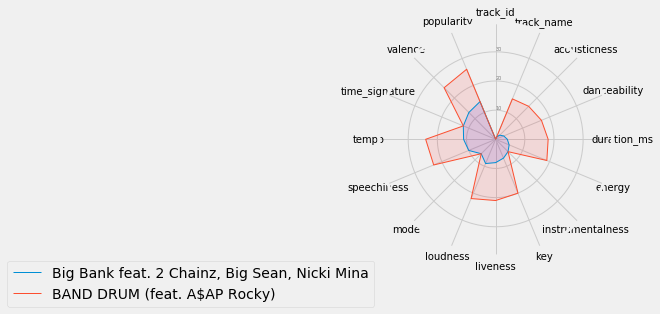

In [59]:
# ------- PART 1: Create background
plt.style.use('fivethirtyeight')
# number of variable
categories=list(df)[1:]
N = len(categories)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size=10)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=5)
plt.ylim(0,40)
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
# Ind1
values=df.loc[0].drop('acousticness').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Big Bank feat. 2 Chainz, Big Sean, Nicki Mina")
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=df.loc[1].drop('acousticness').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="BAND DRUM (feat. A$AP Rocky)")
ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.01, 0.01))

In [70]:
df['track_index'] = full.index
df.track_index

ValueError: Length of values does not match length of index

In [68]:
area_dict = dict(zip(df['track_name'], df['mode']))
#area_dict

 Blue Bird


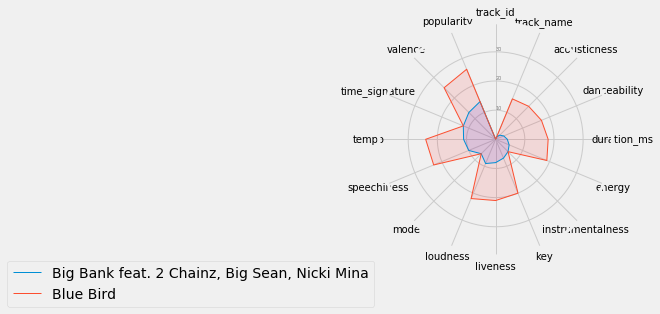

In [69]:
#class
input_string = input()
dict_lookup = area_dict[input_string]

# ------- PART 1: Create background
plt.style.use('fivethirtyeight')
# number of variable
categories=list(df)[1:]
N = len(categories)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size=10)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=5)
plt.ylim(0,40)
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
# Ind1
values=df.loc[0].drop('acousticness').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Big Bank feat. 2 Chainz, Big Sean, Nicki Mina")
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=df.loc[dict_lookup].drop('acousticness').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=input_string)
ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.01, 0.01))